# 1. Importation des modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# 2. Importation de la base et première analyse

In [2]:
df = pd.read_csv("data/AmesHousing.csv")

In [8]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
df.head(5)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

# 3. séparation des jeux entre train et split pour ne pas avoir de data leaking

In [3]:
y = df["SalePrice"]
X = df.drop(["SalePrice"], axis =1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.to_csv("data/X_train.csv",index=False)
X_test.to_csv("data/X_test.csv",index=False)
y_train.to_csv("data/y_train.csv",index=False)
y_test.to_csv("data/y_test.csv",index=False)

# 4. nettoyage de données

In [3]:
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")
df = pd.concat((X_train,y_train), axis =1)
df.shape

(2344, 84)

## Valeurs maquantes

On supprime les colonnes inutiles ou avec trop de valeurs nulles

In [161]:
df = df.drop(["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"], axis=1)

In [162]:
df.shape

(2344, 77)

# 4. Analyse de données

In [9]:
df.iloc[:,0:15]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0              20        RL         141.0     31770   Pave       IR1   
1              20        RH          80.0     11622   Pave       Reg   
2              20        RL          81.0     14267   Pave       IR1   
3              20        RL          93.0     11160   Pave       Reg   
4              60        RL          74.0     13830   Pave       IR1   
...           ...       ...           ...       ...    ...       ...   
2925           80        RL          37.0      7937   Pave       IR1   
2926           20        RL           NaN      8885   Pave       IR1   
2927           85        RL          62.0     10441   Pave       Reg   
2928           20        RL          77.0     10010   Pave       Reg   
2929           60        RL          74.0      9627   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0             Lvl    AllPub     Corner        Gtl        NAmes        Norm   
1             Lvl    AllPub     Inside        Gtl        NAmes       Feedr   
2             Lvl    AllPub     Corner        Gtl        NAmes        Norm   
3             Lvl    AllPub     Corner        Gtl        NAmes        Norm   
4             Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
...           ...       ...        ...        ...          ...         ...   
2925          Lvl    AllPub    CulDSac        Gtl      Mitchel        Norm   
2926          Low    AllPub     Inside        Mod      Mitchel        Norm   
2927          Lvl    AllPub     Inside        Gtl      Mitchel        Norm   
2928          Lvl    AllPub     Inside        Mod      Mitchel        Norm   
2929          Lvl    AllPub     Inside        Mod      Mitchel        Norm   

     Condition 2 Bldg Type House Style  
0           Norm      1Fam      1Story  
1           Norm      1Fam      1Story  
2           Norm      1Fam      1Story  
3           Norm      1Fam      1Story  
4           Norm      1Fam      2Story  
...          ...       ...         ...  
2925        Norm      1Fam        SLvl  
2926        Norm      1Fam      1Story  
2927        Norm      1Fam      SFoyer  
2928        Norm      1Fam      1Story  
2929        Norm      1Fam      2Story  

[2930 rows x 15 columns]

In [57]:
cat_col = ['MS SubClass', 'MS Zoning',
        'Street','Lot Shape', 'Land Contour', 'Utilities',
        'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
        'Overall Cond', 'Roof Style',
        'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
        'Mas Vnr Type', 'Exter Qual',
        'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1',  'BsmtFin Type 2', 
        'Heating', 'Heating QC', 'Central Air',
        'Electrical',  'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
        'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
        'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
        'Garage Finish', 'Garage Cars', 
        'Garage Qual', 'Garage Cond', 'Paved Drive',  'Enclosed Porch', '3Ssn Porch',  'Mo Sold',  'Sale Type',
        'Sale Condition']

num_col = ['Lot Frontage', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',
        'Total Bsmt SF','1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
        'Gr Liv Area','Garage Yr Blt', 'Garage Area','Wood Deck SF',
        'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val','Yr Sold', "Enclosed Porch", "3Ssn Porch",  'SalePrice']

## Analyse des variables quantitatives

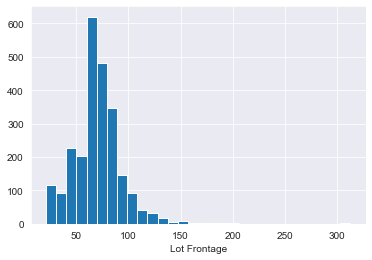

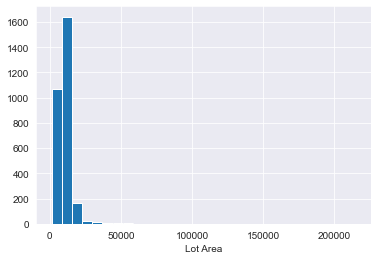

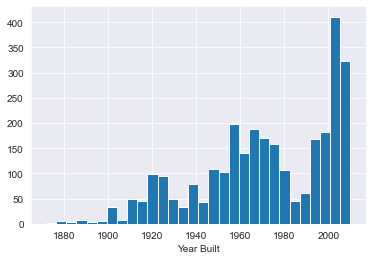

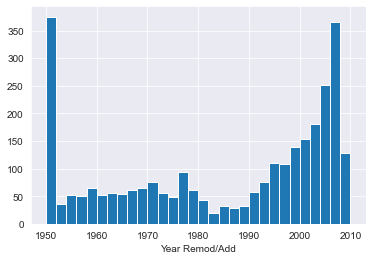

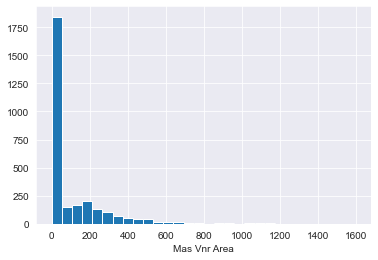

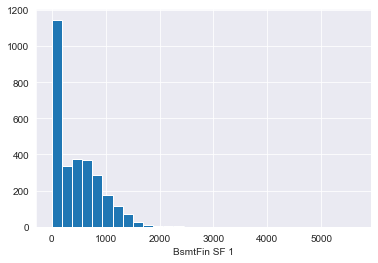

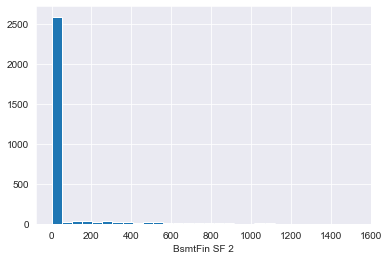

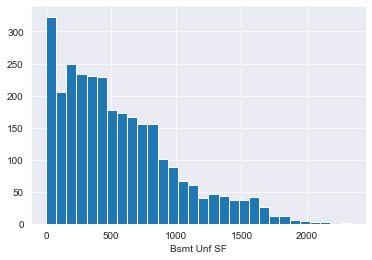

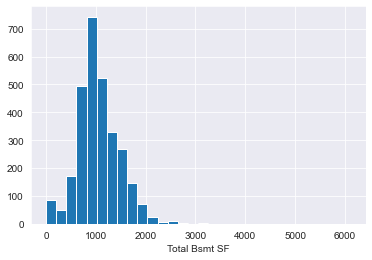

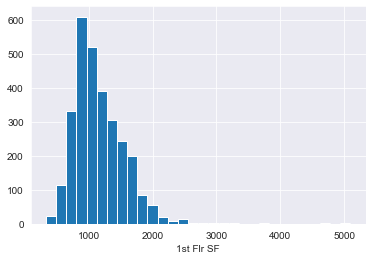

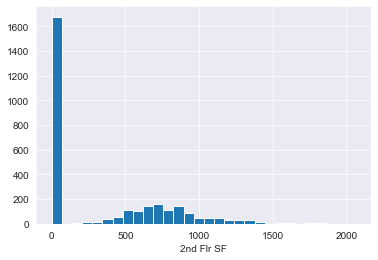

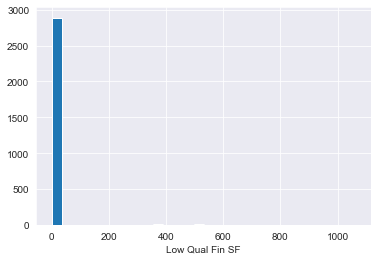

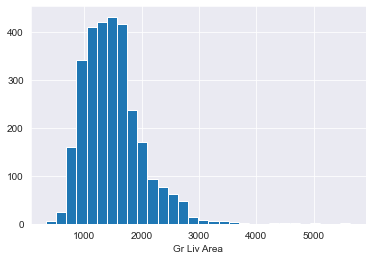

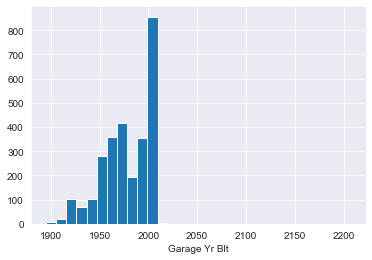

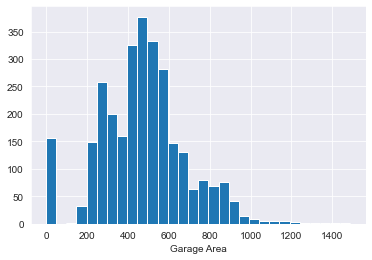

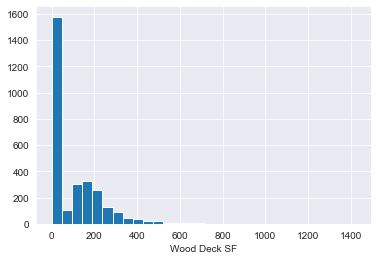

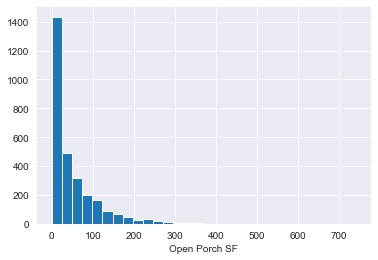

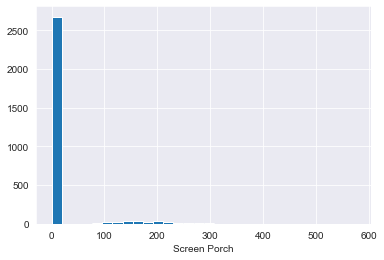

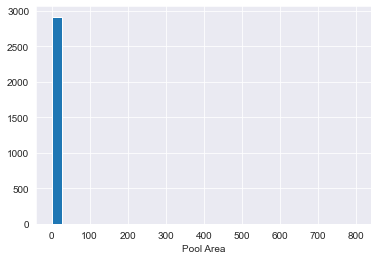

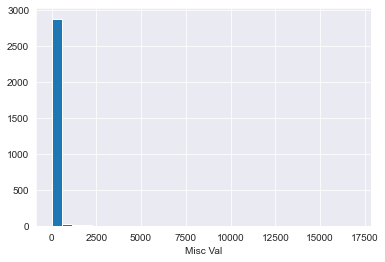

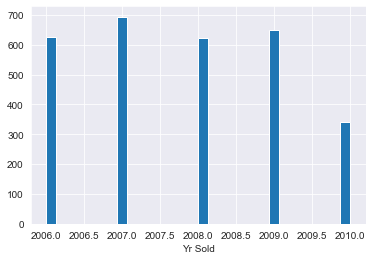

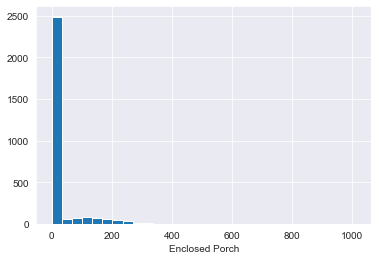

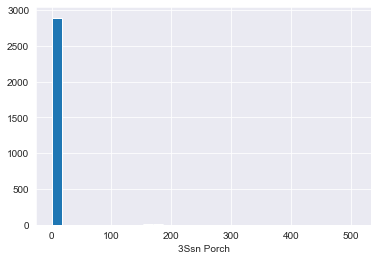

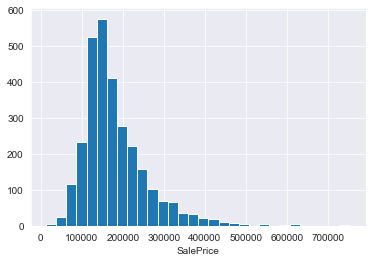

In [60]:
for col in num_col:
    plt.figure()
    plt.hist(x=df[col], bins=30)
    plt.xlabel(col)
    plt.show()

In [61]:
to_drop = [   'BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val', "3Ssn Porch"]

In [62]:
df= df.drop(to_drop,axis=1)

## Analyse des variables catégorielles

On commence par rechercher les colonnes dont la distribution est la plus déséquilibrée

In [30]:
for col in cat_col:
       print(df[col].value_counts())

20     1079
60      575
50      287
120     192
30      139
160     129
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MS SubClass, dtype: int64
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64
Pave    2918
Grvl      12
Name: Street, dtype: int64
Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64
Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkS

On peut distinguer:
- les colonnes complétement déséquilibrées (une valeur pèse au moins 95%) : on les supprime
- les colonnes déséquilibrées (une valeur pèse au moins 85%): s'il n'y a pas d'écart significatif entre les moyennes de saleprice pour chaque catégorie, on les supprime également.

In [38]:
highly_unbalanced_col = ["Street","Utilities", "Condition 2","Roof Matl", "Heating", "Functional","Garage Qual","Garage Cond"]

unbalanced_col = ["Land Slope", "Land Contour", "Condition 1", "Bldg Type", "Exter Cond", "Bsmt Cond", 
            "BsmtFin Type 2", "Central Air", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]

In [33]:
df = df.drop(highly_unbalanced_col, axis=1)

In [37]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3S

In [46]:
df[["Land Slope", "SalePrice"]].groupby(by="Land Slope").mean()


SalePrice
Land Slope               
Gtl         179565.365005
Mod         204853.784000
Sev         207370.625000

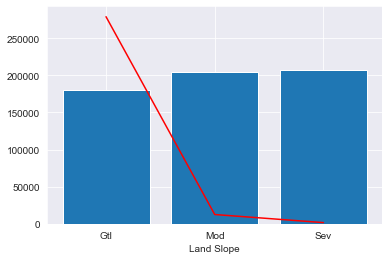

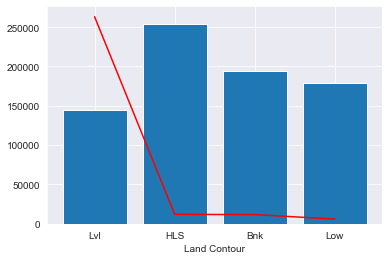

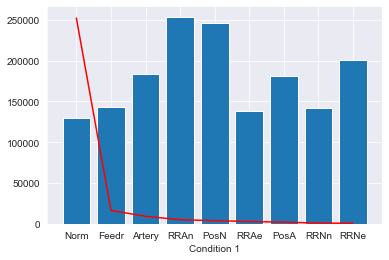

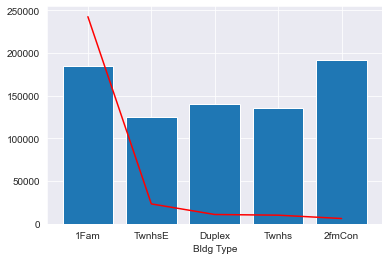

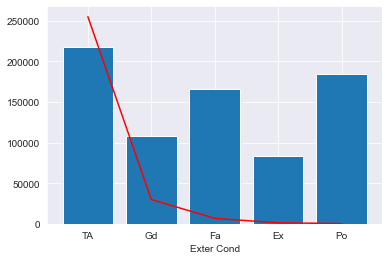

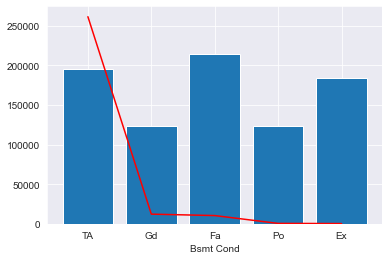

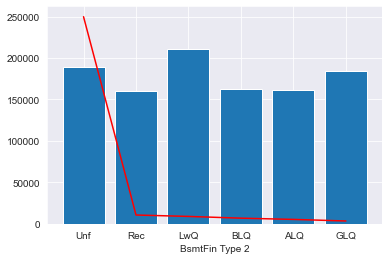

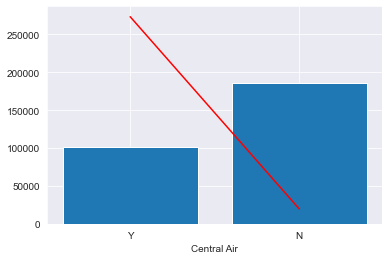

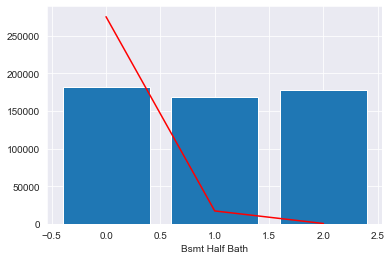

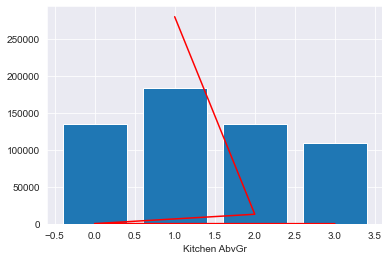

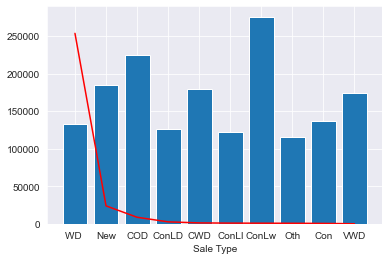

In [52]:
for i,col in enumerate(unbalanced_col,1): 
    plt.figure()
    df_fig = df[[col, "SalePrice"]].groupby(by=col).mean()
    df
    plt.bar(df_fig.index, df_fig.SalePrice)
    df[col].value_counts().apply(lambda x:x*100).plot(kind='line',c="red")
    plt.xlabel(col)
    plt.show()

In [54]:
to_keep = [ "Land Contour", "Bldg Type", "Exter Cond", "Bsmt Cond",  "Central Air"]
to_drop =  ["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
df = df.drop(to_drop, axis=1)

In [ ]:
["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"]
["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
["Street","Utilities", "Condition 2","Roof Matl", "Heating", "Functional","Garage Qual","Garage Cond"]
['BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch','Pool Area', 'Misc Val', "3Ssn Porch"]

## Analyse des corrélations

In [63]:
df.shape

(2930, 54)

In [65]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [10]:
complete_correlation= associations(df,compute_only=True)

NameError: name 'associations' is not defined

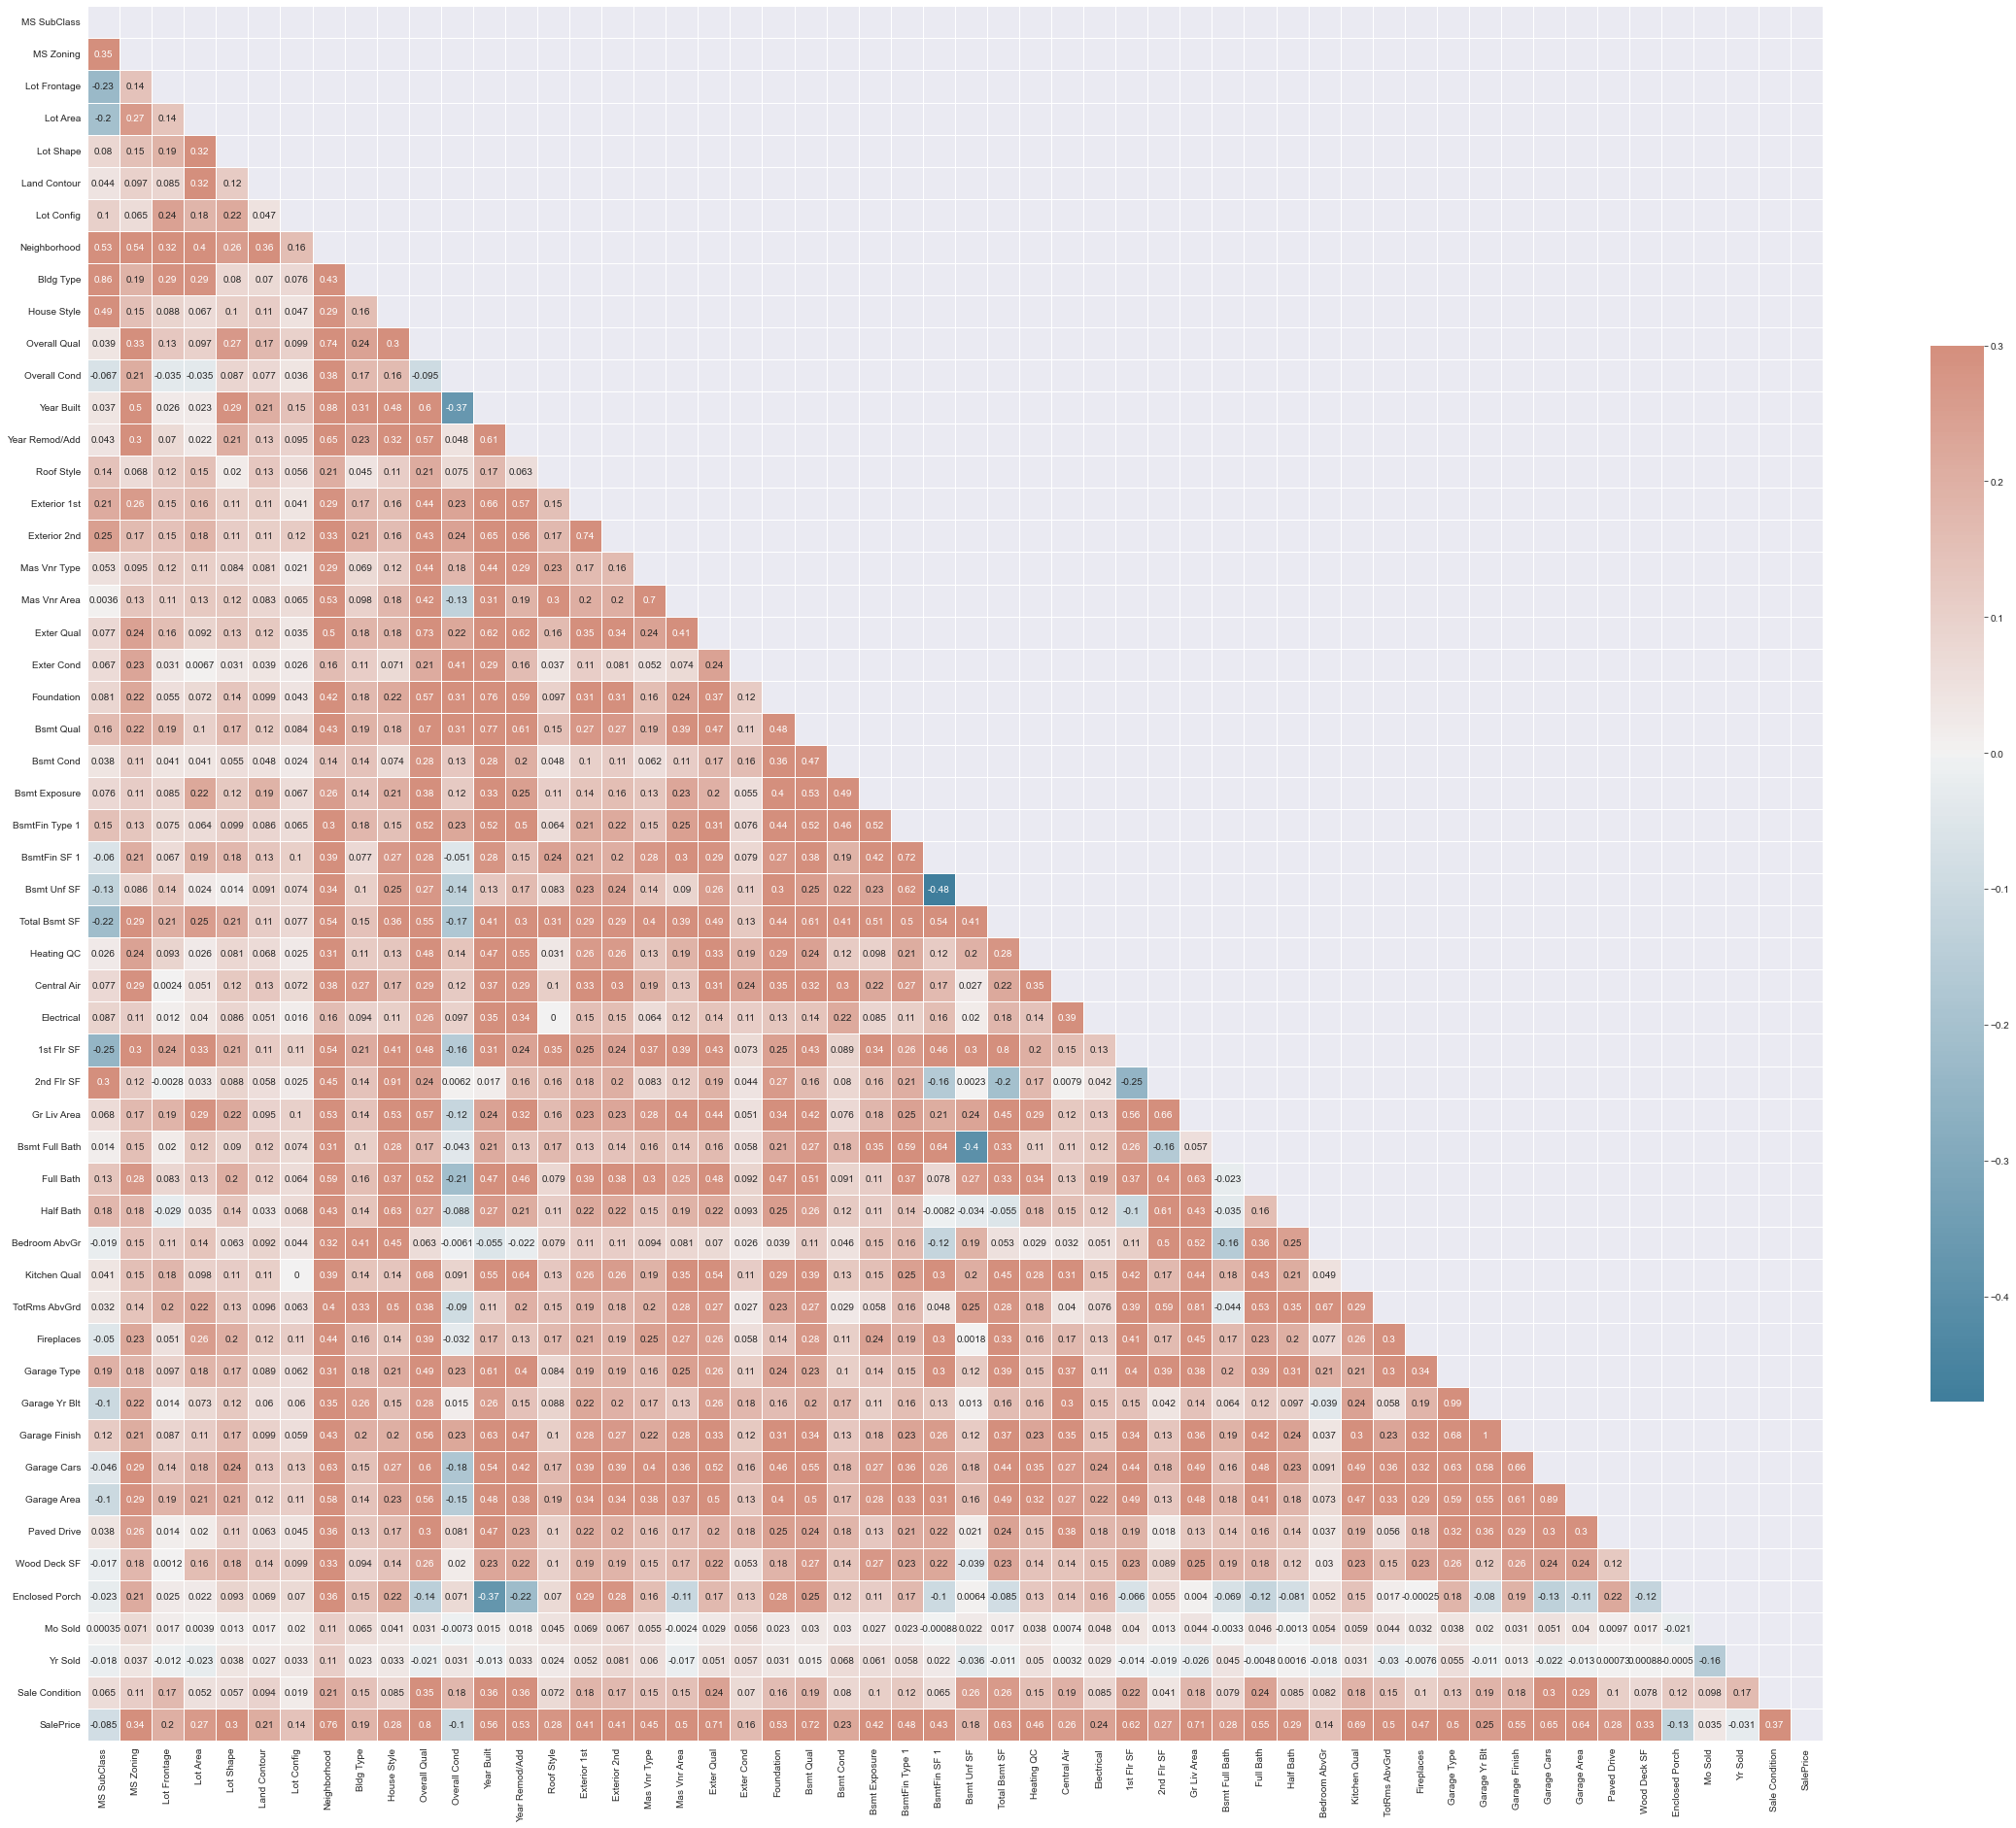

In [71]:
mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(complete_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("corr_matrice.png")

In [73]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Enclosed Porch',
       'Mo Sold', 'Yr Sold', 'Sale Condition', 'SalePrice'],
      dtype='object')

In [100]:
sub_selection = ['Neighborhood', 'Overall Qual', 'Year Built',
       'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF','1st Flr SF', 
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual',  'Garage Finish', 'Garage Cars',
       'Garage Area', 'SalePrice']

In [101]:
df_sub_selection = df[sub_selection]

<AxesSubplot:>

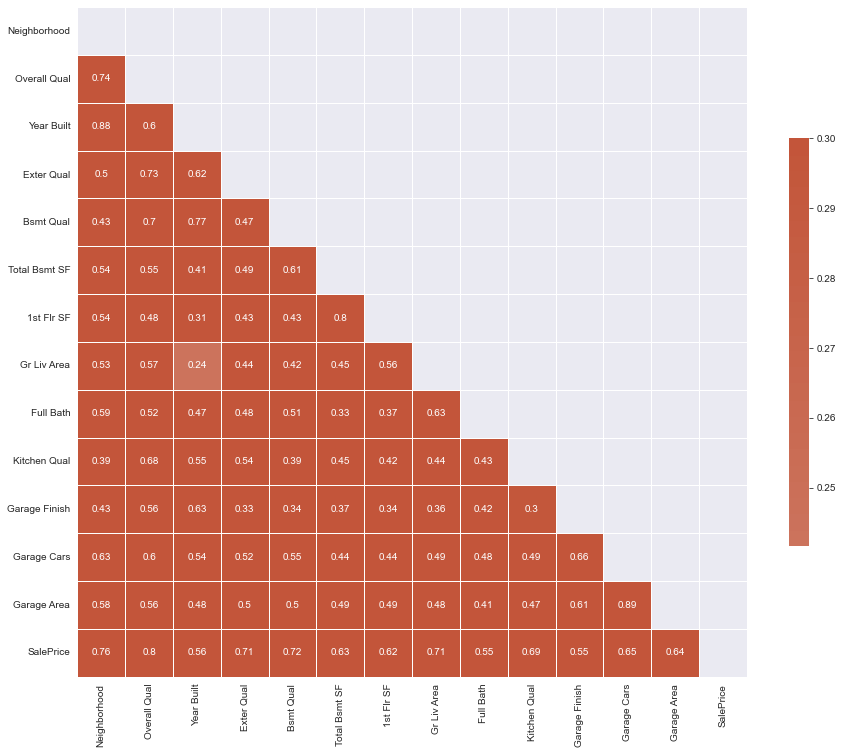

In [78]:
sub_correlation= associations(df_sub_selection,compute_only=True)
mask = np.triu(np.ones_like(sub_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sub_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})


On voit que beaucoup de variables sont corrélées entre elles. On va s'orienter vers un modèle selectif pour pouvoir exclure les variables trop corrélées.

# Préparation des données en vue du modèle

In [90]:
num_selected = ["Year Built", "Total Bsmt SF", "1st Flr SF", "Gr Liv Area", "Garage Area", "SalePrice"]
cat_num = ["Overall Qual", "Full Bath", "Garage Cars"]
cat_str = ["Neighborhood", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Finish"]

In [102]:
df[num_selected].isna().sum()

Year Built       0
Total Bsmt SF    1
1st Flr SF       0
Gr Liv Area      0
Garage Area      1
SalePrice        0
dtype: int64

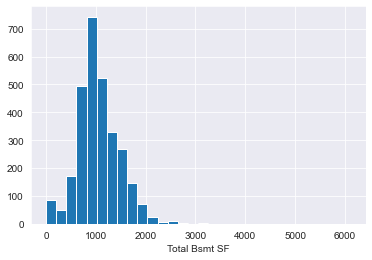

In [103]:
plt.figure()
plt.hist(x=df["Total Bsmt SF"], bins=30)
plt.xlabel("Total Bsmt SF")
plt.show()

In [89]:
df["Total Bsmt SF"].mean()

1051.596928327645

In [105]:
df["Total Bsmt SF"].fillna(1052, inplace=True)

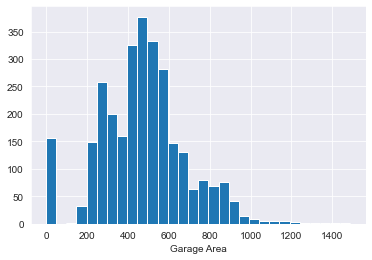

In [85]:
plt.figure()
plt.hist(x=df["Garage Area"], bins=30)
plt.xlabel("Garage Area")
plt.show()

In [88]:
df["Garage Area"].mean()

472.8197336975077

In [104]:
df["Garage Area"].fillna(472, inplace=True)

In [91]:
df[cat_num].isna().sum()

Overall Qual    0
Full Bath       0
Garage Cars     1
dtype: int64

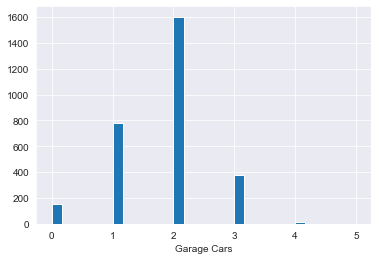

In [92]:
plt.figure()
plt.hist(x=df["Garage Cars"], bins=30)
plt.xlabel("Garage Cars")
plt.show()

In [93]:
df["Total Bsmt SF"].fillna(2, inplace=True)

In [106]:
df[cat_str].isna().sum()

Neighborhood       0
Exter Qual         0
Bsmt Qual         80
Kitchen Qual       0
Garage Finish    159
dtype: int64

In [111]:
df["Bsmt Qual"].value_counts()

TA    1363
Gd    1219
Ex     258
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64

In [108]:
df["Bsmt Qual"].fillna("TA", inplace=True)

In [112]:
df["Garage Finish"].value_counts()

Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64

<AxesSubplot:>

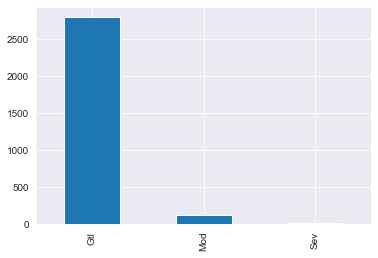

In [ ]:
df["Land Slope"].value_counts().plot(kind='bar')

In [ ]:
df["Bsmt Qual"].fillna("Unf", inplace=True)

# Pipeline et modèle

In [109]:
import pandas as pd
df = pd.read_csv("data/AmesHousing.csv")

Il ne faut selectionner que 10 features, on supprime Neighborhood qui est trop complexe à traiter, ainsi que bsmt Qual et garage Finish qui sont trop proches d'autres variables

In [110]:
numeric_features = ["Year Built", "Total Bsmt SF", "1st Flr SF", "Gr Liv Area", "Garage Area", "Overall Qual", "Full Bath"]
ordinal_features = [ "Exter Qual",  "Kitchen Qual"]
cat_feature = ["Neighborhood"]
all_col = numeric_features.copy()
all_col.extend(ordinal_features)
all_col.extend(cat_feature)

X = df[all_col]
y = df[["SalePrice"]]

X["Total Bsmt SF"].fillna(1052, inplace=True)
X["Garage Area"].fillna(472, inplace=True)

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_14578/1654445062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Total Bsmt SF"].fillna(1052, inplace=True)
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_14578/1654445062.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Garage Area"].fillna(472, inplace=True)


In [111]:
X.columns = ['Year_Built', 'Total_Bsmt_SF', '1st_Flr_SF', 'Gr_Liv_Area','Garage_Area', 'Overall_Qual', 'Full_Bath', 'Exter_Qual',
       'Kitchen_Qual', 'Neighborhood']

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
X_train.to_csv("data/X_train.csv")
X_test.to_csv("data/X_test.csv")
y_train.to_csv("data/y_train.csv")
y_test.to_csv("data/y_test.csv")

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder

numeric_transformer = SimpleImputer()

exter_cat = [ 'Po', 'Fa','TA', 'Gd','Ex']
kitchen_cat = [ 'Po', 'Fa','TA', 'Gd',"Ex"]

ordinal_transformer = OrdinalEncoder(categories=[exter_cat, kitchen_cat])

categorical_transformer = OneHotEncoder()



In [40]:
numeric_features = ["Year_Built", "Total_Bsmt_SF", "1st_Flr_SF", "Gr_Liv_Area", "Garage_Area", "Overall_Qual", "Full_Bath"]
ordinal_features = [ "Exter_Qual",  "Kitchen_Qual"]
cat_feature = ["Neighborhood"]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, cat_feature)
    ]
)

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [42]:
import numpy as np
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_absolute_error

pipe = Pipeline([
     ('preprocessor', preprocessor),
     ('reg', reg)
])


pipe.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Year_Built',
                                                   'Total_Bsmt_SF',
                                                   '1st_Flr_SF', 'Gr_Liv_Area',
                                                   'Garage_Area',
                                                   'Overall_Qual',
                                                   'Full_Bath']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Neighborhood'])])),
                ('reg', LinearRegression())])

In [127]:
from sklearn.metrics import mean_absolute_error
pipe.score(X_test,y_test)

predict_train  = pipe.predict(X_train)
predict_test  = pipe.predict(X_test)

# Root Mean Squared Error on train and test date
print('MAE on train data: ', mean_absolute_error(y_train, predict_train))
print('MAE on test data: ',  mean_absolute_error(y_test, predict_test))



MAE on train data:  21112.817879995368
MAE on test data:  22127.87730721898


In [136]:
pipe['reg'].get_feature_names_out

AttributeError: 'LinearRegression' object has no attribute 'get_feature_names_out'

In [130]:
dir(pipe['reg'])

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [ ]:
from feature_importance import FeatureImportance
feature_importance = FeatureImportance(pipe)
feature_importance.plot(top_n_features=25)

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(search, open(filename, 'wb'))

## Neibourhood analysis

In [ ]:
train = pd.concat((X_train,y_train),axis=1)

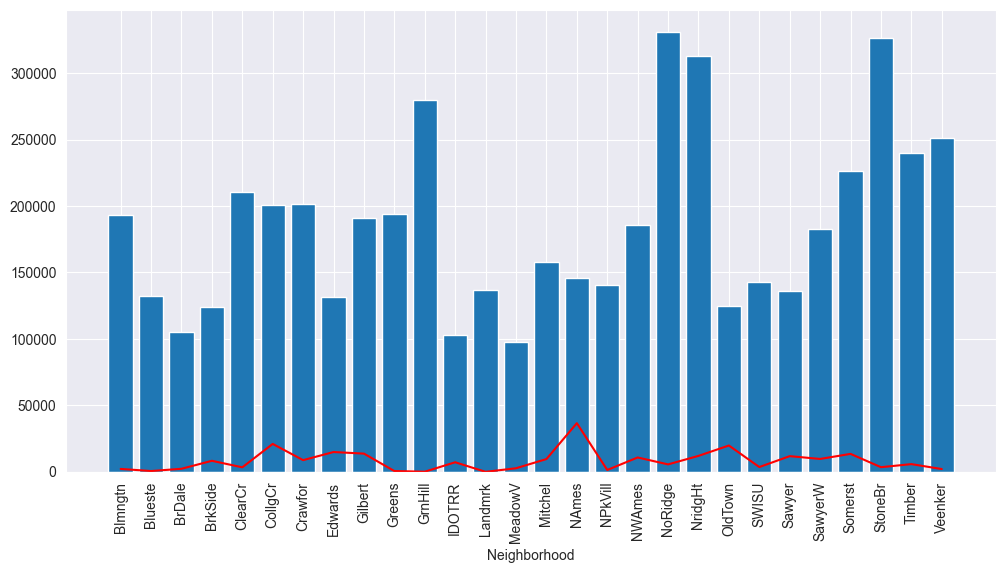

In [ ]:
plt.figure(figsize=(12,6))
train_fig = train[["Neighborhood", "SalePrice"]].groupby(by="Neighborhood").agg(["mean","size"])
plt.bar(train_fig.index, train_fig["SalePrice"]["mean"])
plt.plot(train_fig.index, train_fig["SalePrice"]["size"]*100,c="red")
plt.xlabel("Neighborhood")
plt.tick_params(axis='x',labelrotation=90.0)
plt.show()

In [ ]:
maping = {'Blmngtn':2, 'Blueste':1, 'BrDale':0, 'BrkSide':1, 'ClearCr':2, 'CollgCr':2,
       'Crawfor':2, 'Edwards':1, 'Gilbert':2, 'Greens':2, 'GrnHill':3, 'IDOTRR':0,
       'Landmrk':1, 'MeadowV':0, 'Mitchel':1, 'NAmes':1, 'NPkVill':1, 'NWAmes':2,
       'NoRidge':3, 'NridgHt':3, 'OldTown':1, 'SWISU':1, 'Sawyer':1, 'SawyerW':2,
       'Somerst':2, 'StoneBr':3, 'Timber':2, 'Veenker':2}

In [ ]:
train["neig_map_num"] = train.Neighborhood.map(maping)

In [ ]:
train.columns

Index(['Year Built', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Garage Area', 'Overall Qual', 'Full Bath', 'Exter Qual',
       'Kitchen Qual', 'Neighborhood', 'SalePrice', 'neig_map_num'],
      dtype='object')

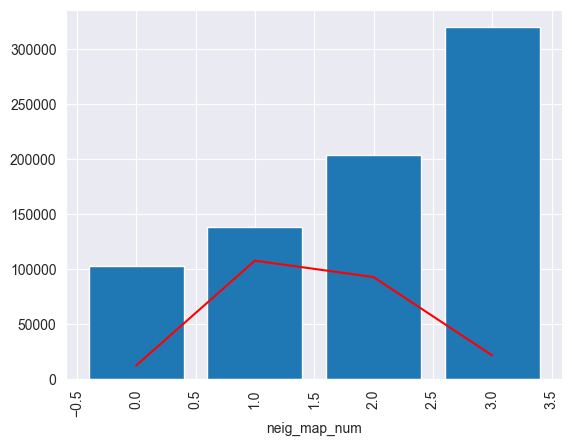

In [ ]:
plt.figure()
train_fig = train[["neig_map_num", "SalePrice"]].groupby(by="neig_map_num").agg(["mean","size"])
plt.bar(train_fig.index, train_fig["SalePrice"]["mean"])
plt.plot(train_fig.index, train_fig["SalePrice"]["size"]*100,c="red")
plt.xlabel("neig_map_num")
plt.tick_params(axis='x',labelrotation=90.0)
plt.show()

In [ ]:
train_fig["SalePrice"]["size"]

neig_map_num
0     125
1    1076
2     927
3     216
Name: size, dtype: int64

In [79]:
train

Year Built  Total Bsmt SF  1st Flr SF  Gr Liv Area  Garage Area  \
381         1976         1090.0        1370         1370        479.0   
834         1967         1013.0        1160         2126        538.0   
1898        1962            0.0        1224         1224        462.0   
678         1949            0.0        1040         1040        420.0   
700         1920          600.0        1101         1701          0.0   
...          ...            ...         ...          ...          ...   
1638        1969         1100.0        1424         1424        828.0   
1095        2002          707.0         707         1414        403.0   
1130        2003          864.0         864         1728        673.0   
1294        1920          936.0         960         1740        225.0   
860         1972          768.0         768          768        396.0   

      Overall Qual  Full Bath Exter Qual Kitchen Qual Neighborhood  SalePrice  \
381              7          2         TA           TA       NWAmes     152000   
834              5          2         TA           TA      ClearCr     185000   
1898             4          2         TA           TA        NAmes     101800   
678              4          2         TA           TA        NAmes      90000   
700              4          2         Fa           Fa      OldTown      94550   
...            ...        ...        ...          ...          ...        ...   
1638             5          1         TA           TA      Gilbert     155000   
1095             7          2         Gd           Gd      Gilbert     176000   
1130             6          2         Gd           Gd      Somerst     207500   
1294             5          1         Fa           Ex      OldTown     122250   
860              5          1         TA           TA      CollgCr     133900   

      neig_map_num  
381              2  
834              2  
1898             1  
678              1  
700              1  
...            ...  
1638             2  
1095             2  
1130             2  
1294             1  
860              2  

[2344 rows x 12 columns]

In [115]:
X_train

Year_Built  Total_Bsmt_SF  1st_Flr_SF  Gr_Liv_Area  Garage_Area  \
381         1976         1090.0        1370         1370        479.0   
834         1967         1013.0        1160         2126        538.0   
1898        1962            0.0        1224         1224        462.0   
678         1949            0.0        1040         1040        420.0   
700         1920          600.0        1101         1701          0.0   
...          ...            ...         ...          ...          ...   
1638        1969         1100.0        1424         1424        828.0   
1095        2002          707.0         707         1414        403.0   
1130        2003          864.0         864         1728        673.0   
1294        1920          936.0         960         1740        225.0   
860         1972          768.0         768          768        396.0   

      Overall_Qual  Full_Bath Exter_Qual Kitchen_Qual Neighborhood  \
381              7          2         TA           TA       NWAmes   
834              5          2         TA           TA      ClearCr   
1898             4          2         TA           TA        NAmes   
678              4          2         TA           TA        NAmes   
700              4          2         Fa           Fa      OldTown   
...            ...        ...        ...          ...          ...   
1638             5          1         TA           TA      Gilbert   
1095             7          2         Gd           Gd      Gilbert   
1130             6          2         Gd           Gd      Somerst   
1294             5          1         Fa           Ex      OldTown   
860              5          1         TA           TA      CollgCr   

      neig_map_num  
381              2  
834              2  
1898             1  
678              1  
700              1  
...            ...  
1638             2  
1095             2  
1130             2  
1294             1  
860              2  

[2344 rows x 11 columns]

In [114]:
X_train["neig_map_num"] = X_train.Neighborhood.map(maping)


In [107]:
X_train = X_test.drop(["Neighborhood"], axis=1)

In [116]:
X_test["neig_map_num"] = X_test.Neighborhood.map(maping)
X_test = X_test.drop(["Neighborhood"], axis=1)

In [117]:
X_test

Year_Built  Total_Bsmt_SF  1st_Flr_SF  Gr_Liv_Area  Garage_Area  \
1357        1925          588.0         833         1666        228.0   
2367        1972          494.0         494         1030        264.0   
2822        2003          796.0         806         1724        616.0   
2126        1994          990.0         990          990          0.0   
1544        1926          894.0         919          919        195.0   
...          ...            ...         ...          ...          ...   
2268        2003          868.0        1146         1146        438.0   
456         2004         2492.0        2492         2492        949.0   
462         2003         1405.0        1405         1405        478.0   
2168        1967          936.0         936          936        384.0   
1488        1965         1256.0        1256         1256        276.0   

      Overall_Qual  Full_Bath Exter_Qual Kitchen_Qual  neig_map_num  
1357             8          1         TA           Gd             1  
2367             6          1         TA           TA             0  
2822             7          2         Gd           Gd             1  
2126             4          1         TA           TA             2  
1544             6          1         TA           TA             0  
...            ...        ...        ...          ...           ...  
2268             7          2         Gd           Gd             2  
456             10          2         Ex           Ex             3  
462              7          2         Gd           Gd             3  
2168             5          1         TA           TA             1  
1488             5          1         Gd           TA             1  

[586 rows x 10 columns]

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder

numeric_transformer = SimpleImputer()

exter_cat = [ 'Po', 'Fa','TA', 'Gd','Ex']
kitchen_cat = [ 'Po', 'Fa','TA', 'Gd',"Ex"]

ordinal_transformer = OrdinalEncoder(categories=[exter_cat, kitchen_cat])

categorical_transformer = OneHotEncoder()



In [124]:
numeric_features = ["Year_Built", "Total_Bsmt_SF", "1st_Flr_SF", "Gr_Liv_Area", "Garage_Area", "Overall_Qual", "Full_Bath"]
ordinal_features = [ "Exter_Qual",  "Kitchen_Qual"]
cat_feature = ["neig_map_num"]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, cat_feature)
    ]
)

In [122]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [125]:
import numpy as np
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_absolute_error

pipe = Pipeline([
     ('preprocessor', preprocessor),
     ('reg', reg)
])


pipe.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Year_Built',
                                                   'Total_Bsmt_SF',
                                                   '1st_Flr_SF', 'Gr_Liv_Area',
                                                   'Garage_Area',
                                                   'Overall_Qual',
                                                   'Full_Bath']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex']]),
                                                  ['Exter_Qual',
                                                   'Kitchen_Qual']),
                                                 ('cat', OneHotEncoder(),
                                                  ['neig_map_num'])])),
                ('reg', LinearRegression())])

In [126]:
from sklearn.metrics import mean_absolute_error
pipe.score(X_test,y_test)

predict_train  = pipe.predict(X_train)
predict_test  = pipe.predict(X_test)

# Root Mean Squared Error on train and test date
print('MAE on train data: ', mean_absolute_error(y_train, predict_train))
print('MAE on test data: ',  mean_absolute_error(y_test, predict_test))



MAE on train data:  21112.817879995368
MAE on test data:  22127.87730721898
